> **提示**：欢迎参加“调查数据集”项目！引用段会添加这种提示，帮助你制定调查方法。提交项目之前，最后浏览一下报告，将这一段删除，以保持报告简洁。首先，需要双击这个 Markdown 框，将标题更改为与数据集和调查相关的标题。

# 项目：研究票房高的电影具有的特点

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

我们从Kaggle获取了从1960年到2015年之间的1万多部电影的TMBd数据， 这包括电影的受欢迎度（popularity），预算（budget），票房（revenue），导演，演职人员（cast），电影类型（genres）等。在这片报告中，我们想要从3个方面来探索票房（revenue）高的电影所具有的特点。第一，票房与预算之间的关系，高预算能否保证电影的高票房。第二，TMDb的评分与票房之间的关系，是不是高票房的电影就会有更好的评分。第三，电影类型与票房之间的关系，特定类型的电影是否更容易获得高票房。


In [217]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [218]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
movies= pd.read_csv('data/tmdb-movies.csv')
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


从上面可以看到，我们的数据集中一共有10866部电影，每部电影共有21个属性，在这里有一些数据我们是不关心的，这包括：id，imdb_id，homepage，tagline，keywords，runtime，production_companies，release_date, release_year， 这些列将会在我们的数据清理阶段被剔除出去。

我们还需要检查数据中是否有重复的数据；对于我们关心的属性：通胀票房（revenue_adj），通货膨胀预算（budget_adj）， 平均投票得分（vote_average）以及电影类型（genres） ，我们还需要检查他们的数据有效性和完整性，这包括是否所有的电影都有相应的值对应到这些属性上，如果没有的话，我们需要进行什么样的处理来保证我们的数据统一。 

#### 数据类型

In [219]:
# check data type 
report_colums = ['budget_adj','revenue_adj','vote_average','genres']
for element in report_colums:
    print("Column: {} \t\t {}。".format(element,movies[element].dtype))   

Column: budget_adj 		 float64。
Column: revenue_adj 		 float64。
Column: vote_average 		 float64。
Column: genres 		 object。


由于数据类型中的值是字母顺序排序的，我决定不去额外的处理和分割其中的值，暂时使用组合好的电影类别来进行分析。

#### 重复数据

In [220]:
#check if there is duplicated data
print("共有{}条数据重复，请看下面的列表：".format(sum(movies.duplicated())))
movies[movies.duplicated(keep=False)]

共有1条数据重复，请看下面的列表：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### 预算和通胀预算

In [221]:
# find the row's whose value is zero or null on the given columName
def findZeroOrNull(df, columName):
    return (df[columName] ==0 ) | (df[columName].isnull())

movies_zero_budget = findZeroOrNull(movies, 'budget_adj')
# ((movies.budget_adj ==0 ) |  movies.budget_adj.isnull())
print("共有{}部电影数据的通胀预算为零.下面列出了其中的5项：".format(movies_zero_budget.sum())) 
movies[movies_zero_budget].head()

共有5696部电影数据的通胀预算为零.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


#### 票房

In [222]:
movies_zero_revenue = findZeroOrNull(movies, 'revenue_adj' )
print("共有{}部电影数据的通胀预算为零.下面列出了其中的5项：".format(movies_zero_revenue.sum())) 
movies[movies_zero_revenue].head()

共有6016部电影数据的通胀预算为零.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


In [223]:
movies_no_genres = movies.genres.isnull()
print("共有{}部电影数据没有分配相应的类别（genres）.下面列出了其中的5项：".format(movies_no_genres.sum())) 
movies[movies_no_genres].head()

共有23部电影数据没有分配相应的类别（genres）.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.0,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.0,0.0


In [224]:
movies_no_vote = findZeroOrNull(movies, 'vote_average')
print("共有{}部电影数据没有TMDb评分.下面列出了其中的5项：".format(movies_no_vote.sum())) 
movies[movies_no_vote].head()

共有0部电影数据没有TMDb评分.下面列出了其中的5项：


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理
下面我们将要根据上面的的调查来清理数据，需要做的事情有：
1. 去掉我们不需要的列
2. 去掉重复的数据行
3. 去掉通货膨胀预算或者通过膨胀票房为空的电影
4. 将电影的类别拆分出来，每一个类别变成一列，值的类型为布尔值。
5. 为没有定义类别的电影添加值：‘Unknown‘


In [225]:
# 去掉不需要的列
movies_clean = movies.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date','vote_count', 'release_year'], axis=1)
# 检查留下的列是否正确。
movies_clean.head()

,original_title,genres,vote_average,budget_adj,revenue_adj
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09
4,Furious 7,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09


In [226]:
movies_clean.shape

(10866, 5)

In [227]:
sum(movies_clean.duplicated())

1

In [228]:
movies_clean.drop_duplicates(inplace=True)
sum(movies_clean.duplicated())

0

In [229]:
#  将通胀预算是0 的电影清除出去。
movies_clean = movies_clean[movies_clean.budget_adj!= 0]
movies_clean.shape

(5169, 5)

In [230]:
# 将通胀票房是0 的电影清除出去。
movies_clean = movies_clean[movies_clean.revenue_adj!= 0]
movies_clean.shape

(3854, 5)

In [231]:
# 检查是否还有没有分类的电影
movies_no_genres = movies_clean.genres.isnull()
movies_no_genres.sum()

0

In [426]:
# 首先获得所有的电影类型集
all_genres = []
for genres_element in movies_clean.genres:
    all_genres.extend(genres_element.split('|'))

all_genres = pd.unique(all_genres)
movies_clean.head()

0

In [430]:
# 生成一个矩阵，长为电影的总数，宽为所有类别的总数
zero_matrix = np.zeros((len(movies_clean),len(all_genres)))
genres_matrix = pd.DataFrame(zero_matrix,columns=all_genres, index =movies_clean.index)

# 按照为分割的电影类别将相应的列中的值变为1
for i, genres_elm in enumerate(movies_clean.genres) :
    index_array = genres_matrix.columns.get_indexer(genres_elm.split('|'))
    genres_matrix.iloc[i,index_array] = 1
    
genres_matrix.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
10822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10829,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10835,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10848,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
genres_matrix.tail()

In [436]:
# 将 genres_matrix 与 movies_clean 合并起来。
movies_genres = movies_clean.join(genres_matrix)
movies_genres.head()

,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,...,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000
mean,6.168163,4.423999e+07,1.370647e+08,0.281526,0.194344,0.134665,0.312403,0.102750,0.168915,0.013492,...,0.352361,0.089258,0.173067,0.030877,0.033472,0.035288,0.120135,0.009081,0.003373,0.000259
std,0.794920,4.480925e+07,2.161114e+08,0.449802,0.395746,0.341410,0.463533,0.303672,0.374726,0.115386,...,0.477768,0.285153,0.378354,0.173007,0.179888,0.184531,0.325161,0.094875,0.057988,0.016108
min,2.200000,9.693980e-01,2.370705e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,1.309053e+07,1.835735e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.200000,3.001611e+07,6.173068e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.700000,6.061307e+07,1.632577e+08,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.400000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [437]:
movies_genres.describe()

,vote_average,budget_adj,revenue_adj,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,...,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000
mean,6.168163,4.423999e+07,1.370647e+08,0.281526,0.194344,0.134665,0.312403,0.102750,0.168915,0.013492,...,0.352361,0.089258,0.173067,0.030877,0.033472,0.035288,0.120135,0.009081,0.003373,0.000259
std,0.794920,4.480925e+07,2.161114e+08,0.449802,0.395746,0.341410,0.463533,0.303672,0.374726,0.115386,...,0.477768,0.285153,0.378354,0.173007,0.179888,0.184531,0.325161,0.094875,0.057988,0.016108
min,2.200000,9.693980e-01,2.370705e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,1.309053e+07,1.835735e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.200000,3.001611e+07,6.173068e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.700000,6.061307e+07,1.632577e+08,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.400000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 预算与票房的关系
这里我们想要去探讨如果一个电影有高于中位数的预算，那相应的这个电影的票房是可以得到保证的。换句话说，电影的预算和票房之间是不是成正比。 

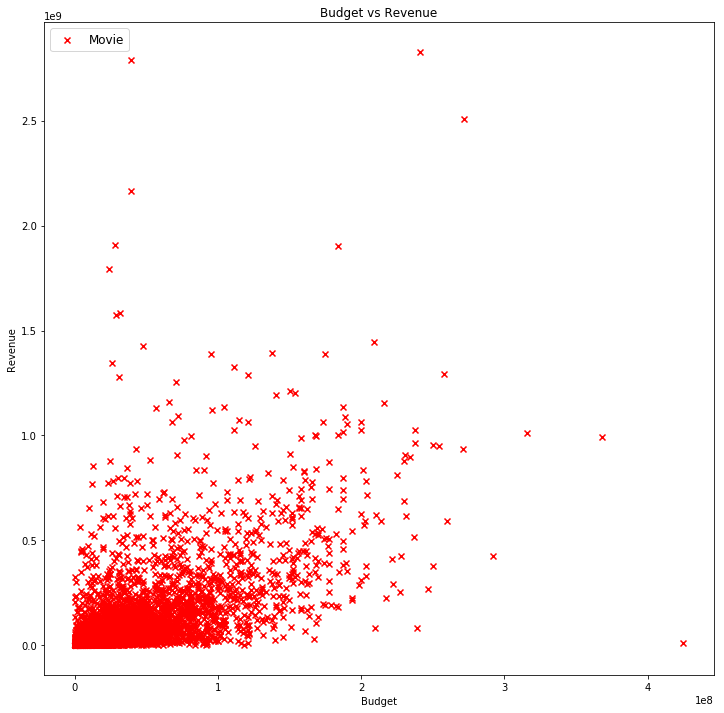

In [235]:
# 绘制预算与票房的散点图。
def plotScatter(x,y,title,xlabel,ylabel,legend):
    fig = plt.figure(figsize=(12, 12))  
    ax1 = fig.add_subplot(111)  
    #设置标题  
    ax1.set_title(title)  
    #设置X轴标签  
    plt.xlabel(xlabel)
    #设置Y轴标签  
    plt.ylabel(ylabel)
    #画散点图  
    ax1.scatter(x, y, c='r',marker='x', label=legend)  
    #设置图标  
    plt.legend( loc='upper left', prop={'size': 12})
    #显示所画的图  
    plt.show()

plotScatter(movies_genres.budget_adj, movies_genres.revenue_adj,'Budget vs Revenue','Budget','Revenue','Movie')

从上面的散点图我们可以看到，总体上预算和票房并没有呈现出线性关系，也就是说随着预算的增加，票房并不会固定增加的。

In [236]:
movies_genres['budget_adj'].describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [237]:
# 对用于把数据“分割”成组的边缘进行分组
bin_edges = [ 9.693980e-01, 1.309053e+07, 3.001611e+07, 6.061307e+07, 4.250000e+08] # 用刚才计算的五个值填充这个列表
# 四个预算水平组的标签
bin_names = [ 'Low','Medium','Moderately High','High'] 

column_index = 5
movies_genres.insert(loc=column_index, column='budget_levels', value=pd.cut(movies_genres['budget_adj'], bin_edges, labels=bin_names))
movies_genres.head()

,original_title,genres,vote_average,budget_adj,revenue_adj,budget_levels,Action,Adventure,Science Fiction,Thriller,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,High,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08,High,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08,High,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09,High,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Furious 7,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09,High,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

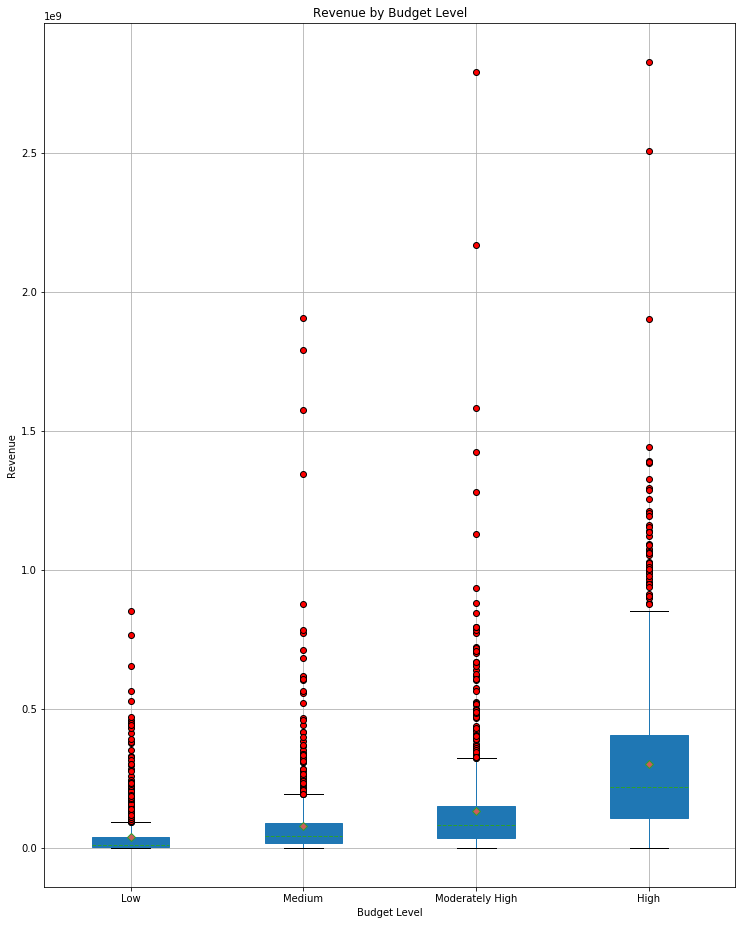

In [238]:
# 按照预算水平来画出每个预算水平组的箱型图
ax = movies_genres.boxplot(column='revenue_adj', by='budget_levels', figsize=(12,16),
                            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
                            showmeans=True, # 以点的形式显示均值
                            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
                            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
                            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
                            medianprops = {'linestyle':'--','color':'orange'})
ax.set_xlabel("Budget Level")
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Budget Level')
plt.suptitle("")

### TMDb的评分与票房的关系

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244685D87B8>]], dtype=object)

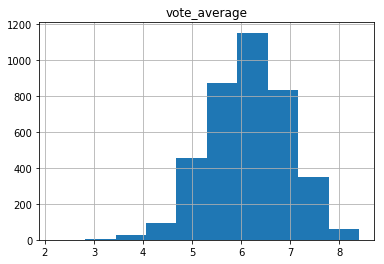

In [239]:
# 首先检查TMDb的评分的分布形状
movies_genres.hist('vote_average')

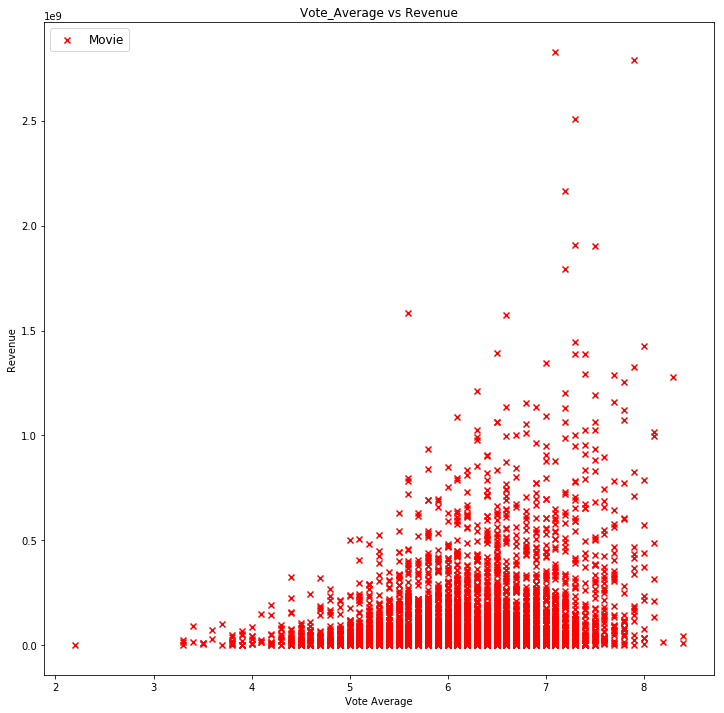

In [240]:
plotScatter(movies_genres.vote_average, movies_genres.revenue_adj,'Vote_Average vs Revenue','Vote Average','Revenue','Movie')

In [241]:
movies_genres['vote_average'].describe()

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [242]:
# 对用于把数据“分割”成组的边缘进行分组
rate_bin_edges = [ 2, 3, 4, 5 ,6, 7, 8, 9] # 用刚才计算的五个值填充这个列表
# 四个预算水平组的标签
rate_bin_names = [ '2-3','3-4','4-5','5-6','6-7','7-8', '8-9'] 

column_index = 3
movies_genres.insert(loc=column_index, column='rate_levels', value=pd.cut(movies_genres['vote_average'], rate_bin_edges, labels=rate_bin_names))
movies_genres.head()

,original_title,genres,vote_average,rate_levels,budget_adj,revenue_adj,budget_levels,Action,Adventure,Science Fiction,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,Foreign,TV Movie
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,6-7,1.379999e+08,1.392446e+09,High,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,7-8,1.379999e+08,3.481613e+08,High,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,6-7,1.012000e+08,2.716190e+08,High,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,7-8,1.839999e+08,1.902723e+09,High,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Furious 7,Action|Crime|Thriller,7.3,7-8,1.747999e+08,1.385749e+09,High,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

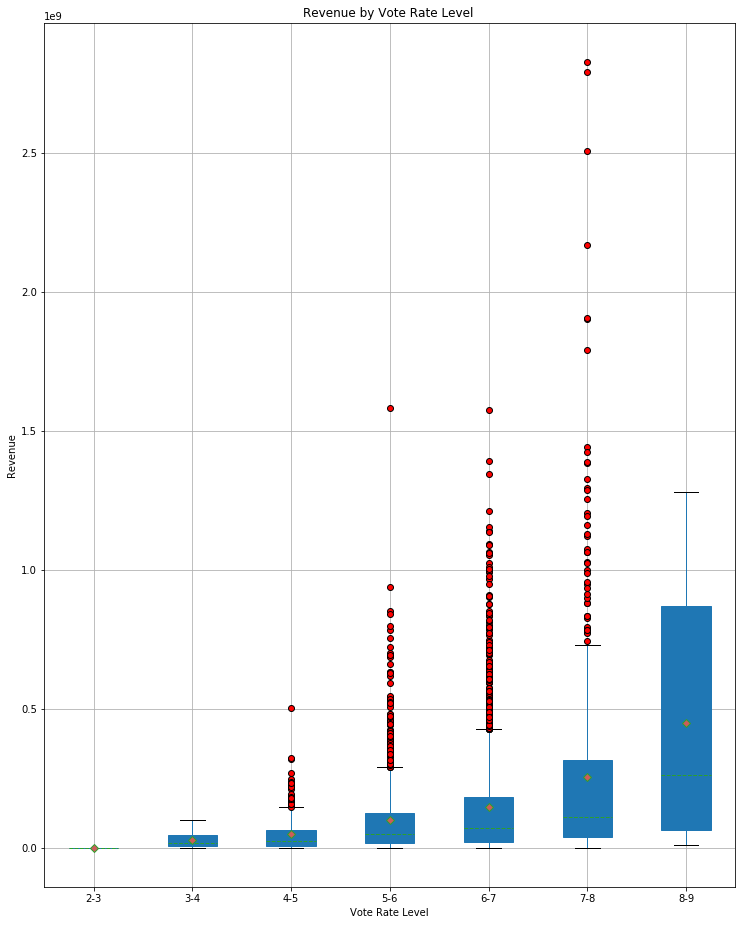

In [243]:
# 按照预算水平来画出每个预算水平组的箱型图
ax = movies_genres.boxplot(column='revenue_adj', by='rate_levels', figsize=(12,16),
                            patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充
                            showmeans=True, # 以点的形式显示均值
                            boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
                            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
                            meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
                            medianprops = {'linestyle':'--','color':'orange'})
ax.set_xlabel("Vote Rate Level")
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Vote Rate Level ')
plt.suptitle("")

### 电影类型与票房之间的关系

In [479]:
genres_revenue = pd.DataFrame(np.zeros((1,len(all_genres))),columns=all_genres)
# 按照为分割的电影类别将相应的列中的值变为1
for genres_elm in all_genres :
    genres_revenue.loc[0,genres_elm] = movies_genres.groupby(genres_elm ,as_index=False).mean()['revenue_adj'].iloc[1]

genres_revenue = genres_revenue.sort_values(genres_revenue.last_valid_index(), axis=1)
genres_revenue = genres_revenue.transpose()
genres_revenue.head()

,0
Foreign,1.273378e+07
Documentary,2.480617e+07
TV Movie,5.838910e+07
Horror,8.140656e+07
Drama,1.013785e+08


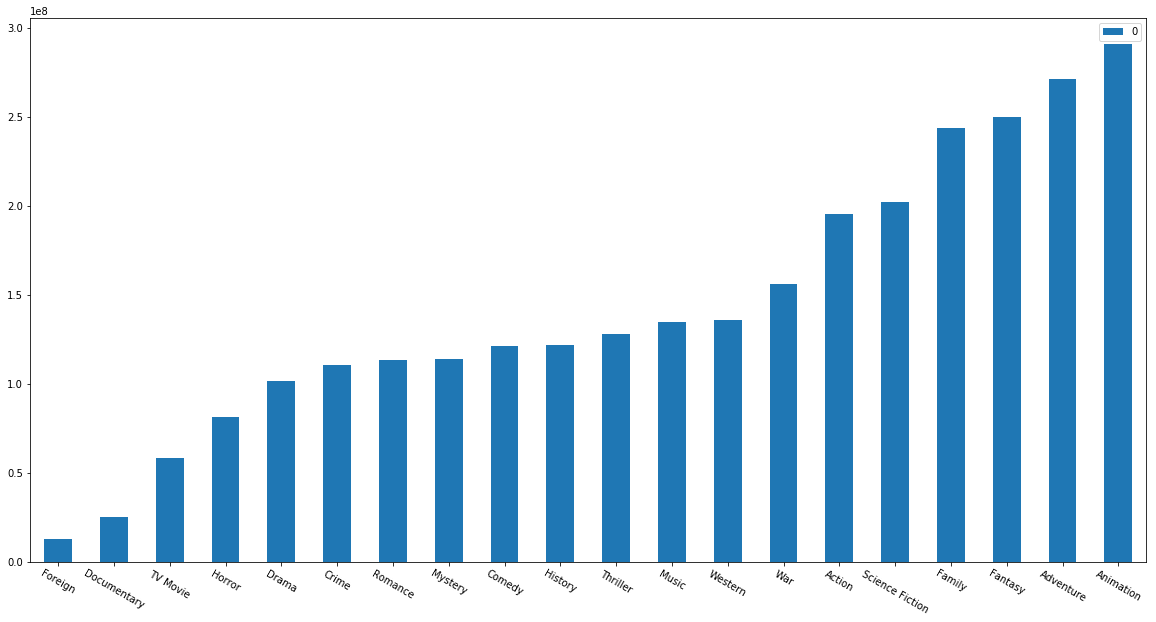

In [486]:
genres_revenue.plot.bar(figsize=(20,10),rot = -30)

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

基于有限的数据我们可以看出来，虽然预算和票房没有必然的联系性，但是所有低预算电影的平均票房是高预算电影的平均票房的四分之一。这从侧面说明高预算电影更容易获得高票房，这里我们需要说明票房并不是利润，也就是说高票房不代表高利润。

In [244]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295